In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')


/tmp/ipykernel_4023/238325712.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('Data/train.csv')


In [3]:
print(train_data.shape)
print(test_data.shape)

(1017209, 9)
(41088, 8)


In [20]:
train_data.head(20)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,7,2015
2015-07-31,2,5,6064,625,1,1,0,1,7,2015
2015-07-31,3,5,8314,821,1,1,0,1,7,2015
2015-07-31,4,5,13995,1498,1,1,0,1,7,2015
2015-07-31,5,5,4822,559,1,1,0,1,7,2015
2015-07-31,6,5,5651,589,1,1,0,1,7,2015
2015-07-31,7,5,15344,1414,1,1,0,1,7,2015
2015-07-31,8,5,8492,833,1,1,0,1,7,2015
2015-07-31,9,5,8565,687,1,1,0,1,7,2015


In [5]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')

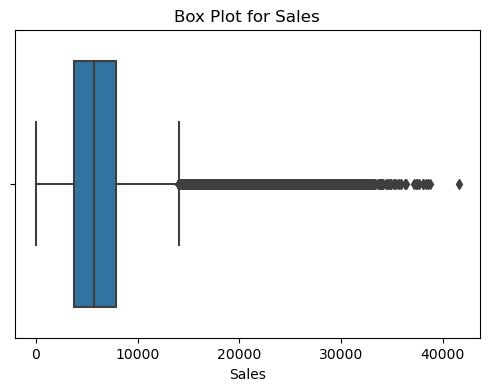

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x=train_data['Sales'])
plt.title('Box Plot for Sales')
plt.show()

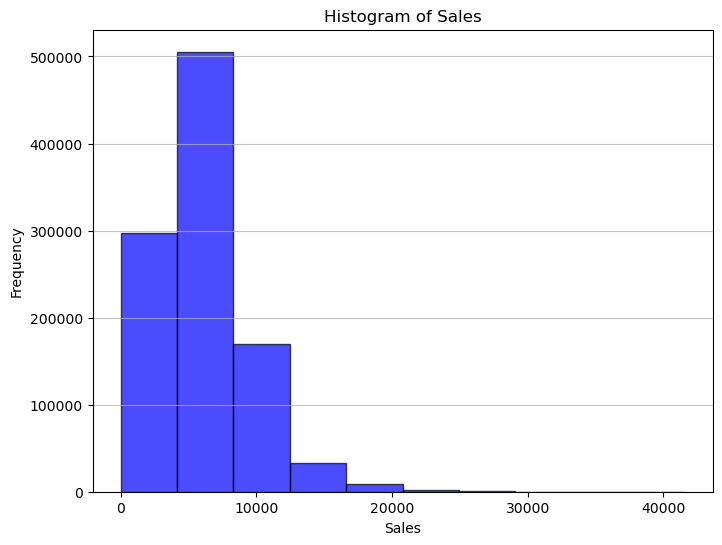

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(train_data['Sales'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

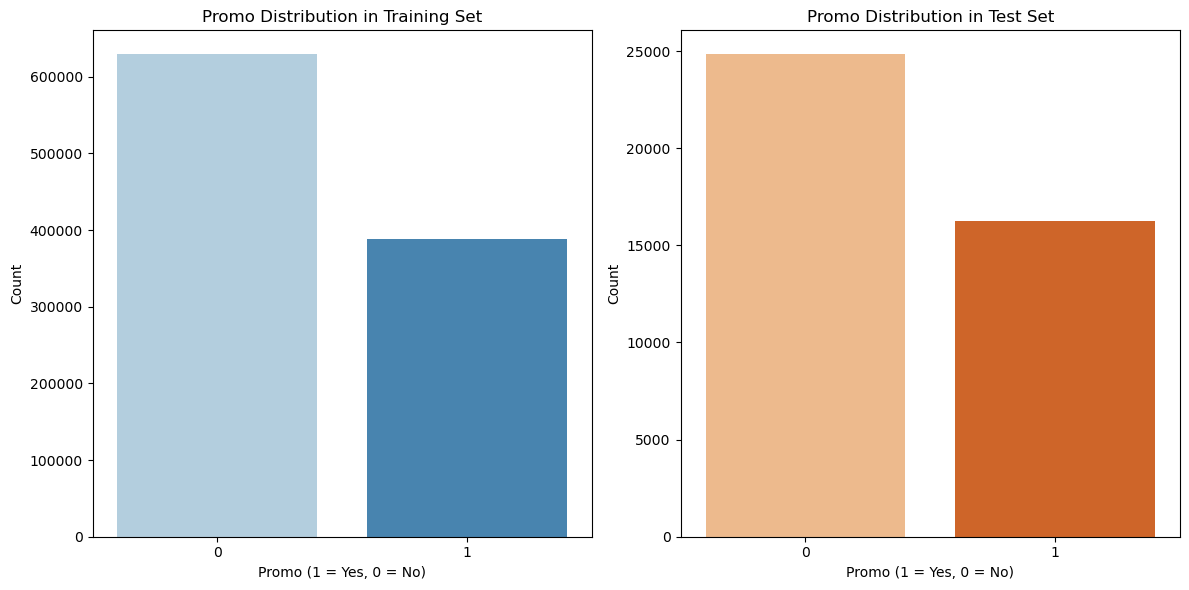

In [10]:
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
sns.countplot(x='Promo', data=train_data, palette='Blues')
plt.title('Promo Distribution in Training Set')
plt.xlabel('Promo (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Test data
plt.subplot(1, 2, 2)
sns.countplot(x='Promo', data=test_data, palette='Oranges')
plt.title('Promo Distribution in Test Set')
plt.xlabel('Promo (1 = Yes, 0 = No)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import chi2_contingency

#contingency table
contingency_table = pd.crosstab(train_data['Promo'], test_data['Promo'])

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
alpha = 0.05
if p < alpha:
    print("The distributions is significantly different.")
else:
    print("The distributions of promo is not significantly different.")

Chi-square Statistic: 944.677972817949
P-value: 1.903812897213676e-207
The distributions is significantly different.


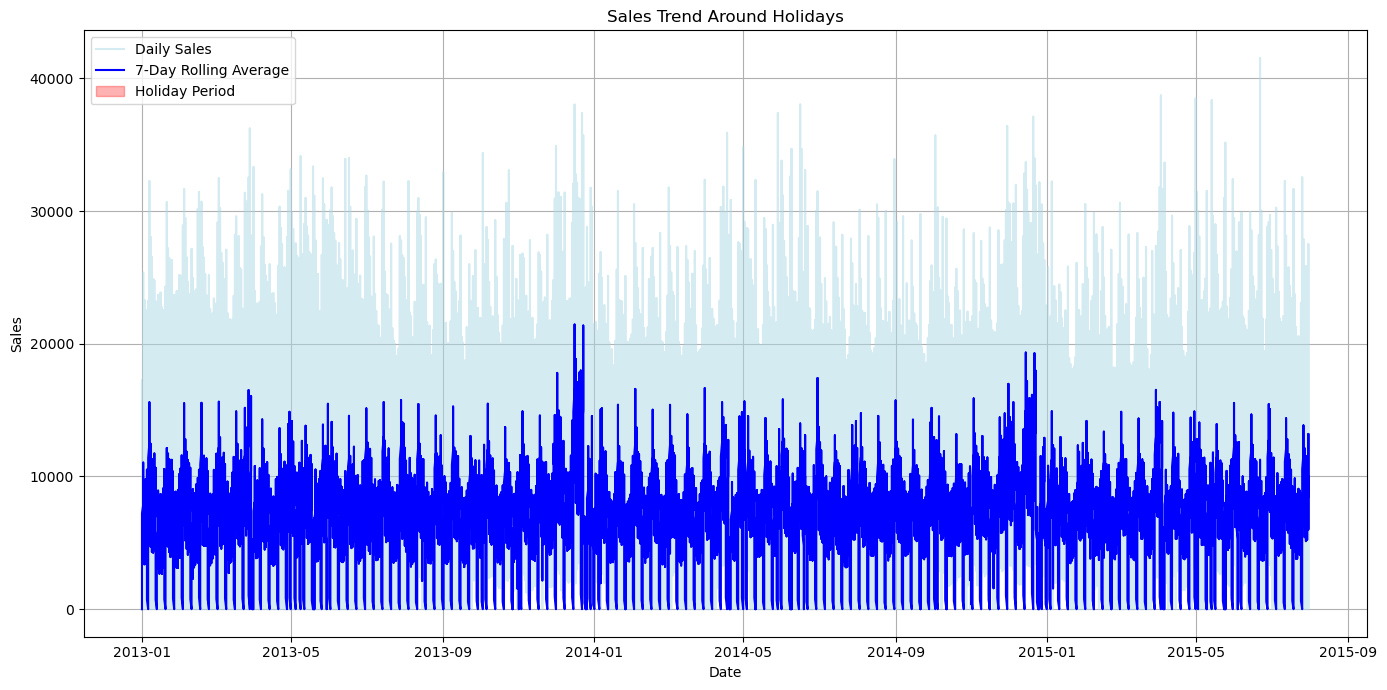

In [12]:
train_data.columns = train_data.columns.str.strip()

if train_data.index.name != 'Date':
    train_data = train_data.set_index('Date')

# Calculate the rolling average
train_data['Rolling Avg'] = train_data['Sales'].rolling(window=7).mean()

# Plot the sales data
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Sales'], label='Daily Sales', color='lightblue', alpha=0.5)
plt.plot(train_data.index, train_data['Rolling Avg'], label='7-Day Rolling Average', color='blue')


plt.fill_between(train_data.index, 0, train_data['Sales'].max(),
                 where=(train_data['StateHoliday'] == ('a','b','c')), color='red', alpha=0.3, label='Holiday Period')

plt.title('Sales Trend Around Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [13]:
print(train_data['SchoolHoliday'].unique())
print(train_data['StateHoliday'].unique())

[1 0]
['0' 'a' 'b' 'c' 0]


In [16]:
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')

<Figure size 1400x700 with 0 Axes>

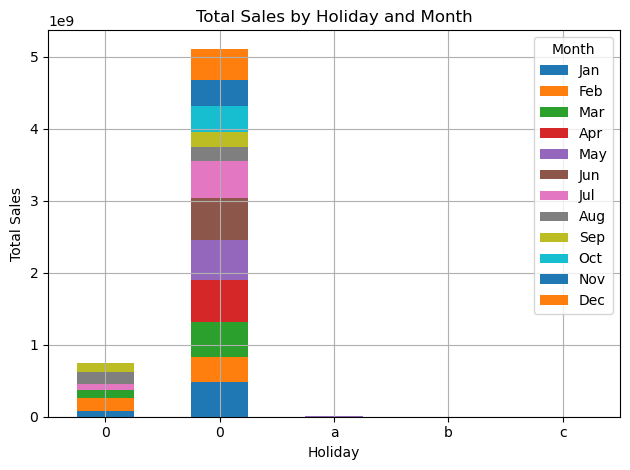

<Figure size 1400x1000 with 0 Axes>

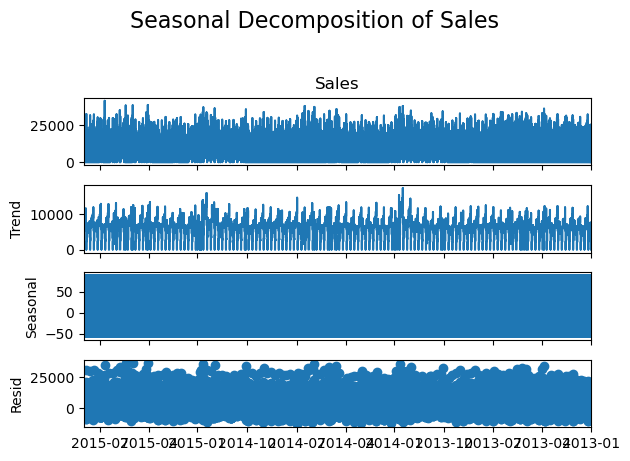

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

train_data['Date'] = pd.to_datetime(train_data['Date'])

train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year

# Group by Holiday and Month, summing sales
holiday_monthly_sales = train_data.groupby(['StateHoliday', 'Month'])['Sales'].sum().unstack(fill_value=0)

# Plotting sales by holiday
plt.figure(figsize=(14, 7))
holiday_monthly_sales.plot(kind='bar', stacked=True)
plt.title('Total Sales by Holiday and Month')
plt.xlabel('Holiday')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Month', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.tight_layout()
plt.show()

train_data.set_index('Date', inplace=True)
decomp = seasonal_decompose(train_data['Sales'], model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(14, 10))
decomp.plot()
plt.suptitle('Seasonal Decomposition of Sales', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Correlation Matrix:
               Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


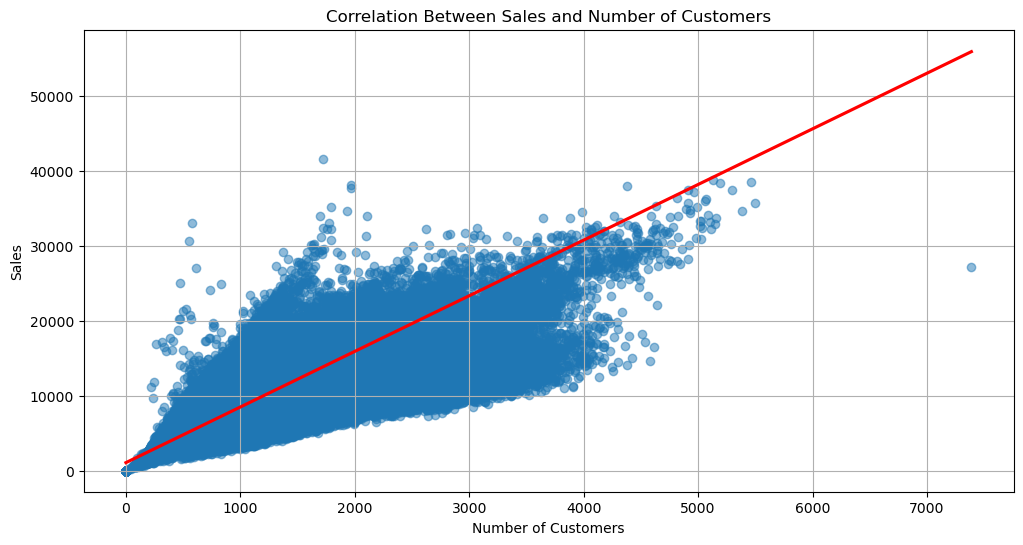

In [82]:
# Print the correlation matrix
correlation_matrix = train_data[['Sales', 'Customers']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plotting the correlation with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='Customers', y='Sales', data=train_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid()
plt.show()

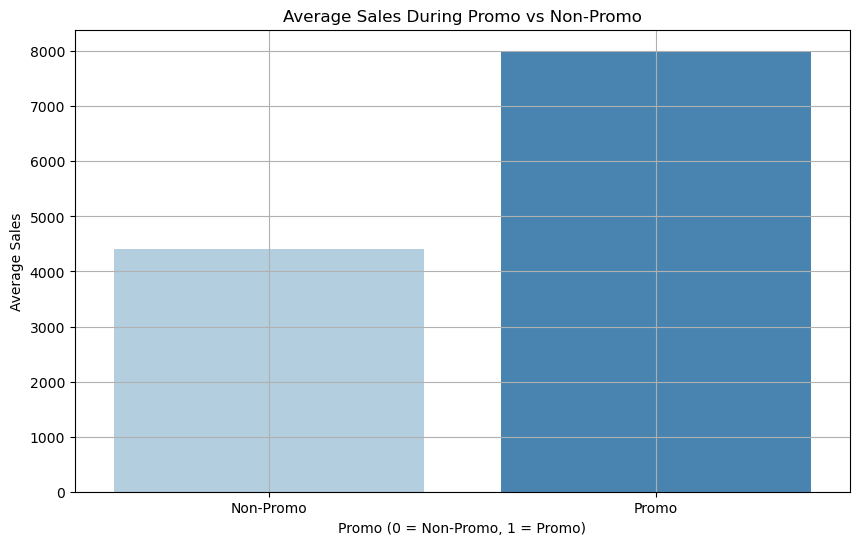

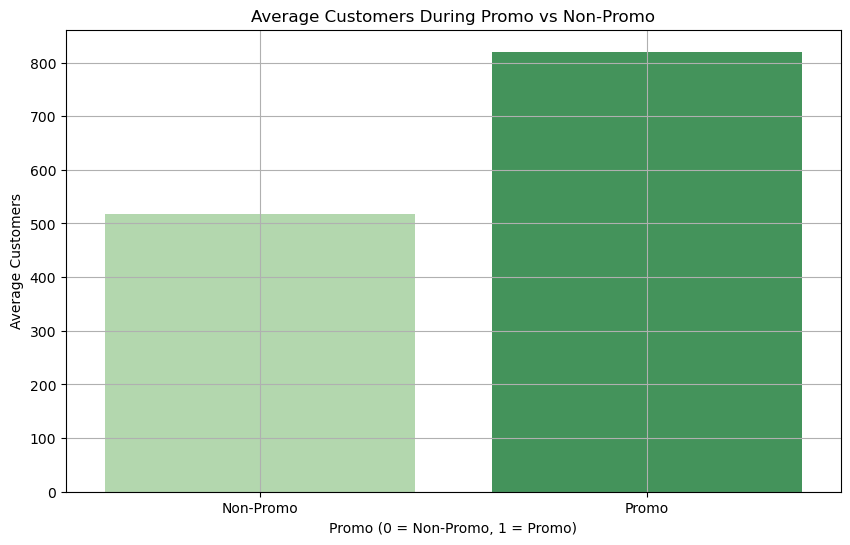

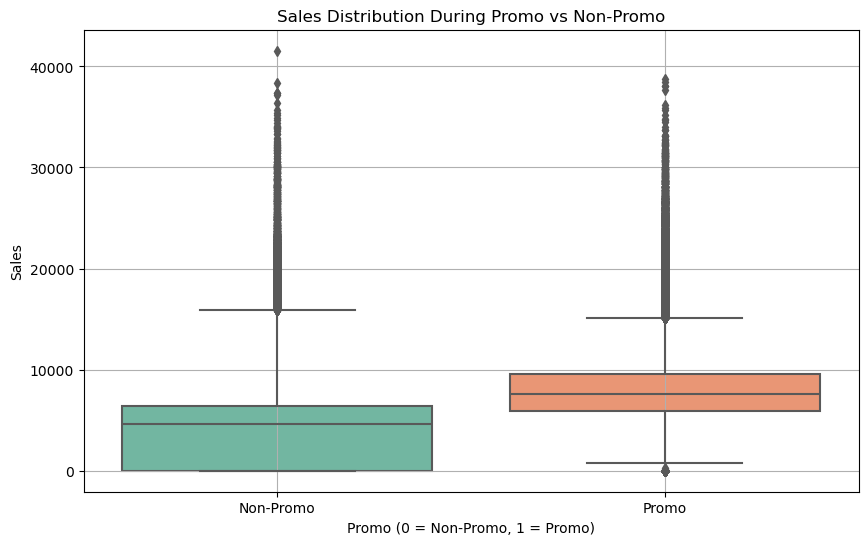

In [19]:
# Average sales during promo vs. non-promo
avg_sales = train_data.groupby('Promo')['Sales'].mean().reset_index()

#  average sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=avg_sales, palette='Blues')
plt.title('Average Sales During Promo vs Non-Promo')
plt.xlabel('Promo (0 = Non-Promo, 1 = Promo)')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Promo', 'Promo'])
plt.grid()
plt.show()

# Visualizing customer count changes during promo periods
avg_customers = train_data.groupby('Promo')['Customers'].mean().reset_index()

# Bar plot for average customers
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Customers', data=avg_customers, palette='Greens')
plt.title('Average Customers During Promo vs Non-Promo')
plt.xlabel('Promo (0 = Non-Promo, 1 = Promo)')
plt.ylabel('Average Customers')
plt.xticks(ticks=[0, 1], labels=['Non-Promo', 'Promo'])
plt.grid()
plt.show()

# Boxplot to examine the distribution of sales during promo and non-promo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_data, palette='Set2')
plt.title('Sales Distribution During Promo vs Non-Promo')
plt.xlabel('Promo (0 = Non-Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Promo', 'Promo'])
plt.grid()
plt.show()

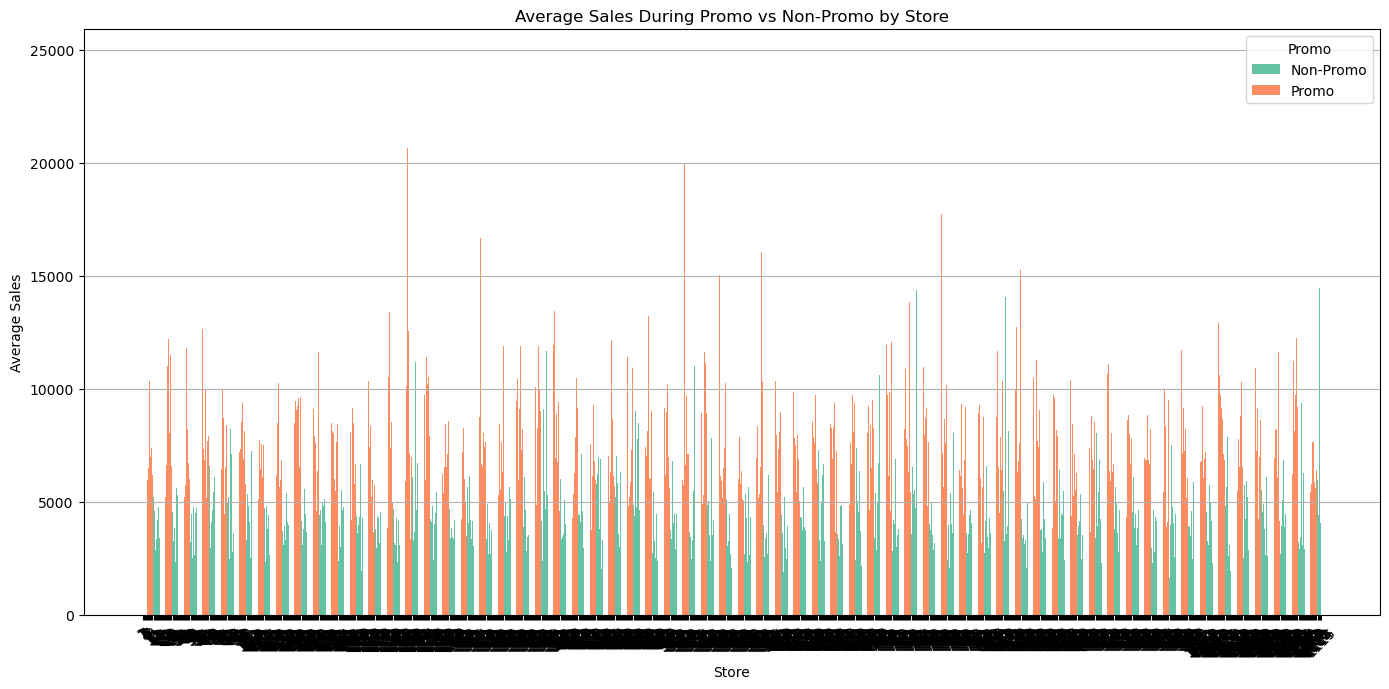

In [29]:
# Group sales data by store and promo
grouped_sales = train_data.groupby(['Store', 'Promo'])['Sales'].mean().unstack(fill_value=0)

# Reset index for better plotting
grouped_sales.reset_index(inplace=True)

# Create a bar plot
plt.figure(figsize=(14, 7))
bar_width = 0.35
x = np.arange(len(grouped_sales['Store']))

# Plotting bars
plt.bar(x - bar_width/2, grouped_sales[0], width=bar_width, label='Non-Promo', color='#66c2a5')
plt.bar(x + bar_width/2, grouped_sales[1], width=bar_width, label='Promo', color='#fc8d62')

# Adding titles and labels
plt.title('Average Sales During Promo vs Non-Promo by Store')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(x, grouped_sales['Store'], rotation=45)
plt.legend(title='Promo')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [42]:
# train_data['Hour'] = pd.to_datetime(train_data['Date']).dt.hour

# # Group by Store and Hour
# hourly_data = train_data.groupby(['Store', 'Hour']).agg({'Sales': 'sum', 'Customers': 'sum'}).reset_index()

# # Pivot for heatmap
# sales_heatmap = hourly_data.pivot(index='Store', columns='Hour', values='Sales')
# customers_heatmap = hourly_data.pivot(index='Store', columns='Hour', values='Customers')

# fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# # Sales heatmap
# sns.heatmap(sales_heatmap, cmap='YlGnBu', ax=axes[0], annot=True, fmt='.0f', cbar_kws={'label': 'Total Sales'})
# axes[0].set_title('Sales Heatmap by Store and Hour')
# axes[0].set_xlabel('Hour of the Day')
# axes[0].set_ylabel('Store ID')
# axes[0].set_ylim(len(sales_heatmap), 0)  # Reverse the y-axis for better readability

# # Customers heatmap
# sns.heatmap(customers_heatmap, cmap='YlOrRd', ax=axes[1], annot=True, fmt='.0f', cbar_kws={'label': 'Total Customers'})
# axes[1].set_title('Customer Traffic Heatmap by Store and Hour')
# axes[1].set_xlabel('Hour of the Day')
# axes[1].set_ylabel('Store ID')
# axes[1].set_ylim(len(customers_heatmap), 0)  # Reverse the y-axis for better readability

# # Show the plot
# plt.tight_layout()
# plt.show()